<a href="https://colab.research.google.com/github/Harshithpalan/-Agentic-Financial-Advisor/blob/main/DL_d_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LAB: BUILD A NEURAL NETWORK USING NUMPY

OBJECTIVE:

1. Built a Neural network manually.
2. Implement forward propagation.
3. Implement backward propagation.
4. Train using gradient descent.
5. Plot loss curve.
6. Understand how learning happens.

In [ ]:
#start with importing neccessary librarries
import numpy as np
import matplotlib.pyplot as plt

WE WILL SOLVE A BINARY CLASSIFICATION PROBLEM
1. PASS/FAIL
2. YES/NO, 1/0

In [ ]:
#Create a data (Fake Dataset)
np.random.seed(0) #reproducebility

#inputs(100 samples, 2 features)
X = np.random.randn(100,2)

#output: 1 if sum>0 else 0
y = (X[:,0]+ X[:,1]>0).astype(int) #y=[1,0,0,0,1....]
print(y)
#reshape
y = y.reshape(-1,1)


[1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1
 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1]


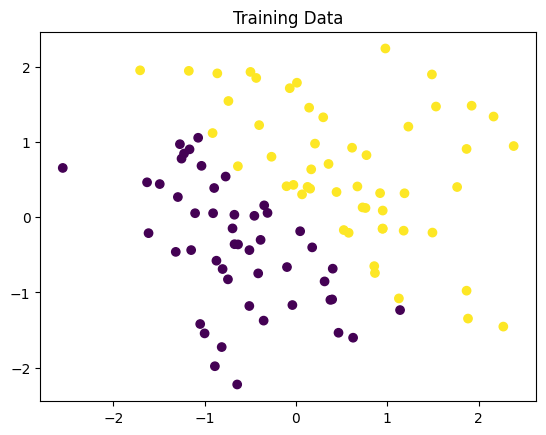

In [ ]:
#plotting the data
plt.scatter(X[:,0],X[:,1],c=y)
plt.title("Training Data")
plt.show() #Blue dot: Class 0, Yellow dot: class 1.

In [ ]:
#Design Neural Network
#We ll build: input(2) -> Hidden(4) -> output(1)

input_size = 2
hidden_size = 4
output_size = 1

#initialise the weights
#in between input and hidden layer
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1,hidden_size))

#in between output and hidden layer
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1,output_size))


In [ ]:
#Activation Function: Sigmoid and Relu
def relu(z):
    return np.maximum(0,z)

def relu_derivative(z):
    return (z>0).astype(float)

def sigmoid(z):
    return 1/(1+np.exp(-z)) #Output layer

In [ ]:
#Forward propagation (prediction step)
def forward(X):

    Z1 = np.dot(X,W1)+b1 #weighted sum
    A1 = relu(Z1) #Activated

    Z2 = np.dot(A1,W2)+b2 #Hidden -> output
    A2 = sigmoid(Z2) #Predtion

    return Z1, A1, Z2, A2

In [ ]:
#Loss function (Binary Cross-Entropy)
def loss(y, y_pred):
    return -np.mean(y*np.log(y_pred+1e-8) + (1-y)*np.log(1-y_pred+1e-8))

In [ ]:
#Backward propagation
def backward(X,y,Z1,A1,A2,lr):
    global W1,b1,W2,b2
    m = X.shape[0]

    #Output layer
    dZ2 = A2 - y
    dW2 = np.dot(A1.T,dZ2)/m
    db2 = np.sum(dZ2,axis=0,keepdims=True)/m

    #Hidden layer
    dA1 = np.dot(dZ2,W2.T)
    dZ1 = dA1*relu_derivative(Z1)

    dW1 = np.dot(X.T,dZ1)/m
    db1 = np.sum(dZ1,axis=0,keepdims=True)/m

    #update
    W1 -= lr*dW1
    b1 -= lr*db1
    W2 -= lr*dW2
    b2 -= lr*db2

In [ ]:
#Training loop(combine everthing)
epochs = 2000
lr = 0.1

losses = []

for i in range(epochs):

    Z1,A1,Z2,A2=forward(X)
    l = loss(y,A2)
    losses.append(l)

    backward(X,y,Z1,A1,A2,lr)

    if i % 20 == 0:
        print("Epoch:",i, "Loss:",1)

Epoch: 0 Loss: 1
Epoch: 20 Loss: 1
Epoch: 40 Loss: 1
Epoch: 60 Loss: 1
Epoch: 80 Loss: 1
Epoch: 100 Loss: 1
Epoch: 120 Loss: 1
Epoch: 140 Loss: 1
Epoch: 160 Loss: 1
Epoch: 180 Loss: 1
Epoch: 200 Loss: 1
Epoch: 220 Loss: 1
Epoch: 240 Loss: 1
Epoch: 260 Loss: 1
Epoch: 280 Loss: 1
Epoch: 300 Loss: 1
Epoch: 320 Loss: 1
Epoch: 340 Loss: 1
Epoch: 360 Loss: 1
Epoch: 380 Loss: 1
Epoch: 400 Loss: 1
Epoch: 420 Loss: 1
Epoch: 440 Loss: 1
Epoch: 460 Loss: 1
Epoch: 480 Loss: 1
Epoch: 500 Loss: 1
Epoch: 520 Loss: 1
Epoch: 540 Loss: 1
Epoch: 560 Loss: 1
Epoch: 580 Loss: 1
Epoch: 600 Loss: 1
Epoch: 620 Loss: 1
Epoch: 640 Loss: 1
Epoch: 660 Loss: 1
Epoch: 680 Loss: 1
Epoch: 700 Loss: 1
Epoch: 720 Loss: 1
Epoch: 740 Loss: 1
Epoch: 760 Loss: 1
Epoch: 780 Loss: 1
Epoch: 800 Loss: 1
Epoch: 820 Loss: 1
Epoch: 840 Loss: 1
Epoch: 860 Loss: 1
Epoch: 880 Loss: 1
Epoch: 900 Loss: 1
Epoch: 920 Loss: 1
Epoch: 940 Loss: 1
Epoch: 960 Loss: 1
Epoch: 980 Loss: 1
Epoch: 1000 Loss: 1
Epoch: 1020 Loss: 1
Epoch: 1040 Loss

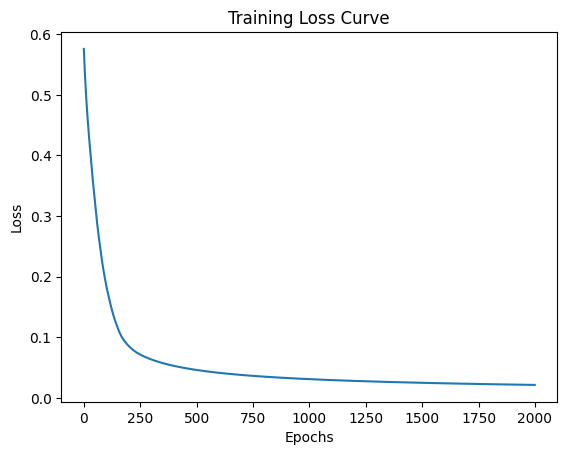

In [ ]:
#Visulaise the loss
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

In [ ]:
#test the model accuracy
pred = (A2>0.5).astype(int)
acc = np.mean(pred==y)

print("Accuracy:", acc)

Accuracy: 1.0
